In [9]:
!pip install transformers torch
!pip install sentence-transformers


In [10]:
from keras.layers import Dense
from keras import Sequential, Model
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, BatchNormalization, Activation, Dropout

# Creating Xception base model

baseModel = keras.applications.Xception(
    include_top=False,
    weights="imagenet",
    input_shape=(299, 299, 3),
    pooling="avg"
)

# Set the layers of the base_model to be non-trainable

for layer in baseModel.layers:
    layer.trainable = False

# Building custom model on top of Xception
model = Sequential()
model.add(baseModel)
model.add(Dense(128, activation='relu'))
model.add(Dense(1))

# Saveing the entire model
model.save('/content/modelWeights.keras')


Enter the path of an image (or press Enter to finish): /content/pexels-ian-turnell-709552.jpg
Enter the path of an image (or press Enter to finish): /content/pexels-james-wheeler-414612.jpg
Enter the path of an image (or press Enter to finish): 
1/1 [==============================] - 0s 350ms/step


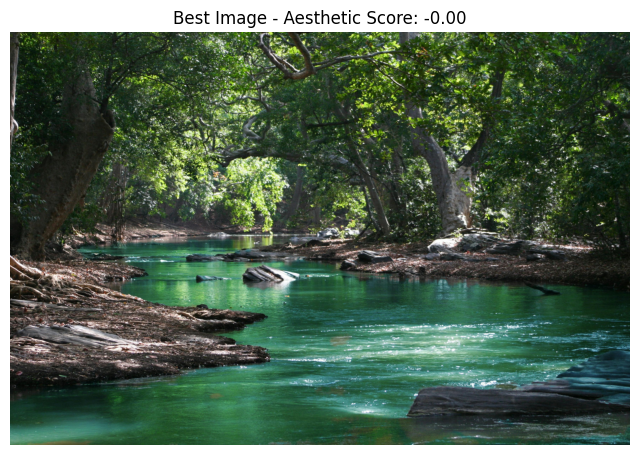

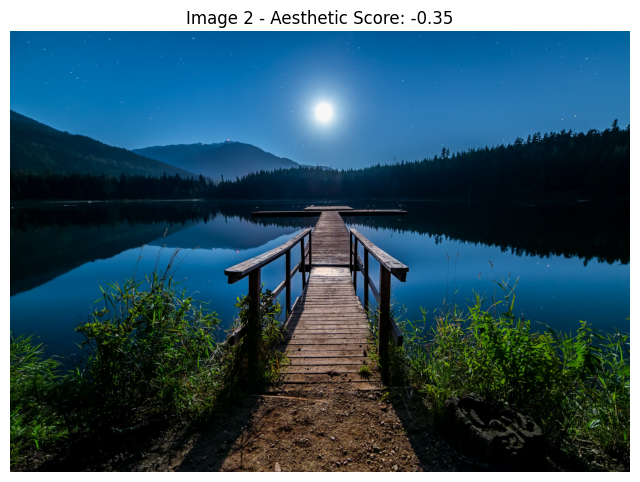


Reason Caption for the Best Image:
The juxtaposition of elements adds an intriguing and thought-provoking touch.


In [11]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.xception import preprocess_input
from sentence_transformers import SentenceTransformer, util
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import tensorflow.keras as keras
import random

# Loading the fine-tuned model
loadedModel = keras.models.load_model('/content/modelWeights.keras')

# Loading a different pre-trained sentence transformer model
sentenceTransformerModel = SentenceTransformer('paraphrase-distilroberta-base-v1')

# Function to preprocess an image and predict aesthetic score using the loaded model
def predictAestheticScore(imgPath):
    imgArray = preprocessImage(imgPath)
    score = loadedModel.predict(imgArray)[0][0]
    return score

# Function to preprocess an image
def preprocessImage(imgPath):
    img = image.load_img(imgPath, target_size=(299, 299))
    imgArray = image.img_to_array(img)
    imgArray = np.expand_dims(imgArray, axis=0)
    imgArray = preprocess_input(imgArray)
    return imgArray

dynamicReasons = [
    "The composition and framing of the image are excellent.",
    "The color balance and tones are pleasing to the eye.",
    "The subject is well-focused, creating a strong visual impact.",
    "The lighting enhances the overall aesthetic of the photograph.",
    "The use of shadows adds a captivating element to the image.",
    "The choice of perspective brings a unique and interesting angle.",
    "The subtle details in the background contribute to the overall charm.",
    "The image evokes a sense of emotion and storytelling.",
    "The creative use of depth of field adds depth and dimension.",
    "The overall aesthetic is both timeless and contemporary.",
    "The vibrant colors create a lively and energetic atmosphere.",
    "The symmetry in the composition adds a sense of balance and harmony.",
    "The play of light and shadow creates a dynamic visual effect.",
    "The juxtaposition of elements adds an intriguing and thought-provoking touch."

]

# Input loop for image paths
imagePaths = []
while True:
    imgPath = input("Enter the path of an image (or press Enter to finish): ")
    if imgPath == '':
        break
    imagePaths.append(imgPath)

# Predicting aesthetic scores for the input images
predictedScores = [predictAestheticScore(imgPath) for imgPath in imagePaths]

# Determining the best image based on the highest score
bestImageIndex = np.argmax(predictedScores)
bestImagePath = imagePaths[bestImageIndex]

# Displaying all input images with their scores
for i, (imgPath, score) in enumerate(zip(imagePaths, predictedScores)):
    img = mpimg.imread(imgPath)
    label = "Best Image" if i == bestImageIndex else f"Image {i + 1}"

    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.title(f"{label} - Aesthetic Score: {score:.2f}")
    plt.axis('off')
    plt.show()

# Generating a reason caption for the best image
bestScore = predictedScores[bestImageIndex]
ReasonCaption = generateRandomReasonCaption(dynamicReasons)  # Use generateRandomReasonCaption

# Final output
print(f"\nReason Caption for the Best Image:\n{ReasonCaption}")
